In [3]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
import astropy.units as u
import astropy.constants as c
from astropy.cosmology import Planck18 as cosmo

sys.path.append(os.environ['DH_DIR'])
import darkhistory.physics as dhphys

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.preprocessing.accretion import PBHAccretionModel

import matplotlib.pyplot as plt

(1e-18, 0.0001)

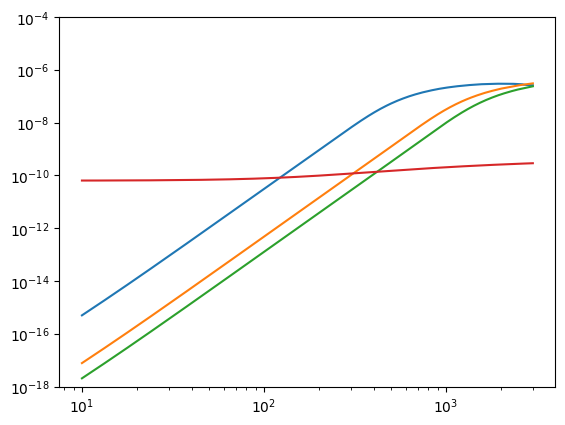

In [10]:
m_PBH = 1000

am_s = [
    PBHAccretionModel('PR-ADAF', c_in=10),
    PBHAccretionModel('PR-ADAF', c_in=23),
    PBHAccretionModel('PR-ADAF', c_in=30),
    PBHAccretionModel('BHL-ADAF')
]

z_s = np.geomspace(10, 3000-1, 300)

for am in am_s:
    Mdot_s = []
    for z in z_s:
        T_k = dhphys.Tm_std(1+z)
        rho_inf = (cosmo.critical_density(z) * cosmo.Ob(z)).to(u.g/u.cm**3).value
        Mdot_s.append(am.Mdot_cosmo_single_PBH(m_PBH, z, rho_inf, T_k))

    plt.plot(z_s, Mdot_s, label=am.name)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-18, 1e-4)

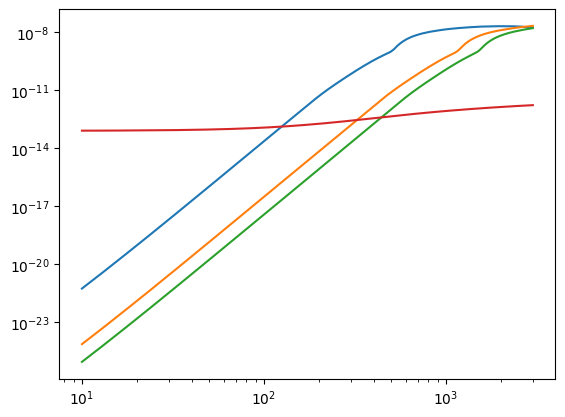

In [11]:
m_PBH = 1000

am_s = [
    PBHAccretionModel('PR-ADAF', c_in=10),
    PBHAccretionModel('PR-ADAF', c_in=23),
    PBHAccretionModel('PR-ADAF', c_in=30),
    PBHAccretionModel('BHL-ADAF')
]

z_s = np.geomspace(10, 3000-1, 300)

for am in am_s:
    Mdot_s = []
    for z in z_s:
        T_k = dhphys.Tm_std(1+z)
        rho_inf = (cosmo.critical_density(z) * cosmo.Ob(z)).to(u.g/u.cm**3).value
        Mdot_s.append(am.L_cosmo_single_PBH(m_PBH, z, rho_inf, T_k))

    plt.plot(z_s, Mdot_s, label=am.name)
plt.yscale('log')
plt.xscale('log')
# plt.ylim(1e-18, 1e-4)